# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
headers = '''step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.'''


headdict = {}
for h in headers.split('\n'):
    try:
        headdict.update({h.split(' - ')[0] : h.split(' - ')[1]})
    except:
        continue

In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [7]:
headdict['isFraud']

'This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.'

In [8]:
headdict['isFlaggedFraud']

'The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.'

In [9]:
df.corrwith(df['isFraud']).abs().sort_values()

newbalanceDest    0.000535
oldbalanceDest    0.005885
newbalanceOrig    0.008148
oldbalanceOrg     0.010154
step              0.031578
isFlaggedFraud    0.044109
amount            0.076688
isFraud           1.000000
dtype: float64

In [10]:
# What do you think will be the important features in determining the outcome?

# Amount, isFlaggedFraud, step
# Also old and new balance is highly correlated, in fraudulent transactions the money is usually quickly taken out of the account

### What is the distribution of the outcome? 

In [11]:
import seaborn as sns
#sns.kdeplot(df['isFraud'])
# Binomial

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [14]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [15]:
df['nameOrig'].nunique()

6353307

In [16]:
df['nameDest'].nunique()

2722362

In [17]:
df.drop(['nameDest', 'nameOrig'], axis=1, inplace=True)

In [18]:
dumms = pd.get_dummies(df['type'], drop_first=True)

In [19]:
df = pd.concat([df,dumms], axis=1).drop('type', axis=1)

In [20]:
headdict['step']

'maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).'

# 

In [21]:
# Step column could be dropped too..
df.drop('step', axis=1, inplace=True)

In [22]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=55)

### Run a logisitc regression classifier and evaluate its accuracy.

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

C:\Users\feren\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)

In [26]:
from sklearn.metrics import r2_score, mean_squared_error, auc, confusion_matrix, classification_report,recall_score

In [27]:
r2_score(y_test, y_pred)

-0.7140974602671151

In [49]:
confusion_matrix(y_test, y_pred)

array([[3171129,    6106],
       [    870,    3205]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test, y_pred)

0.9978071926344808

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   3177235
           1       0.34      0.79      0.48      4075

    accuracy                           1.00   3181310
   macro avg       0.67      0.89      0.74   3181310
weighted avg       1.00      1.00      1.00   3181310



### Now pick a model of your choice and evaluate its accuracy.

In [30]:
# Downsampling the majority and use the same model.

In [31]:
from sklearn.utils import resample
df_majority = df[df.isFraud==0]
df_minority = df[df.isFraud==1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=len(df_minority)*10)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled = df_upsampled.sample(frac=1)

df_upsampled_X = df_upsampled.drop('isFraud', axis=1)
df_upsampled_y = df_upsampled['isFraud']

In [32]:
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(df_upsampled_X, df_upsampled_y, test_size=0.5, random_state=55)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_us_scaled = scaler.fit_transform(X_train_upsampled)
X_test_us_scaled = scaler.fit_transform(X_test_upsampled)

In [34]:
model2 = LogisticRegression()

model2.fit(X_train_us_scaled, y_train_upsampled)


C:\Users\feren\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
X_test_scaled = scaler.fit_transform(X_test)
y_pred_upsampled = model2.predict(X_test_scaled)
y_upsample_score = model.predict_proba(X_test_scaled)

In [36]:
confusion_matrix(y_test, y_pred_upsampled)

array([[3177127,     108],
       [   3098,     977]], dtype=int64)

In [37]:
import numpy as np
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [38]:
df_majority_downsampled = resample(df_majority, 
                                 replace=True,
                                 n_samples=round(len(df_majority)/10))

df_downsampled = pd.concat([df_minority, df_majority_downsampled])
df_downsampled = df_downsampled.sample(frac=1)

df_downsampled_X = df_downsampled.drop('isFraud', axis=1)
df_downsampled_y = df_downsampled['isFraud']
X_train_downsampled, X_test_downsampled, y_train_downsampled, y_test_downsampled = train_test_split(df_downsampled_X, df_downsampled_y, test_size=0.5, random_state=55)

In [39]:
X_train_ds_scaled = scaler.fit_transform(X_train_downsampled)
X_test_ds_scaled = scaler.fit_transform(X_test_downsampled)
model3 = LogisticRegression()
model3.fit(X_train_ds_scaled, y_train_downsampled)

C:\Users\feren\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred_downsampled = model.predict(X_test_scaled)
y_downsample_score = model.predict_proba(X_test_scaled)

Legitimate Transactions Detected (True Negatives):  3177127
Legitimate Transactions Incorrectly Detected (False Positives):  108
Fraudulent Transactions Missed (False Negatives):  3098
Fraudulent Transactions Detected (True Positives):  977
Total Fraudulent Transactions:  4075


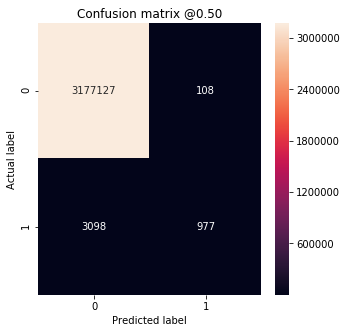

In [54]:
plot_cm(y_test, y_pred_upsampled)

In [55]:
accuracy_score(y_test, y_pred_upsampled)

0.9989922390461791

Legitimate Transactions Detected (True Negatives):  3171129
Legitimate Transactions Incorrectly Detected (False Positives):  6106
Fraudulent Transactions Missed (False Negatives):  870
Fraudulent Transactions Detected (True Positives):  3205
Total Fraudulent Transactions:  4075


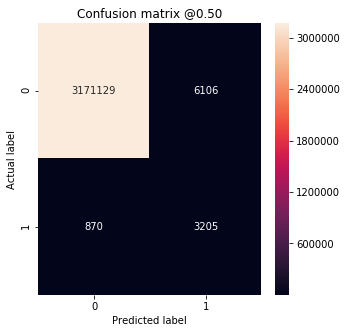

In [42]:
plot_cm(y_test, y_pred)

Legitimate Transactions Detected (True Negatives):  3177231
Legitimate Transactions Incorrectly Detected (False Positives):  4
Fraudulent Transactions Missed (False Negatives):  3276
Fraudulent Transactions Detected (True Positives):  799
Total Fraudulent Transactions:  4075


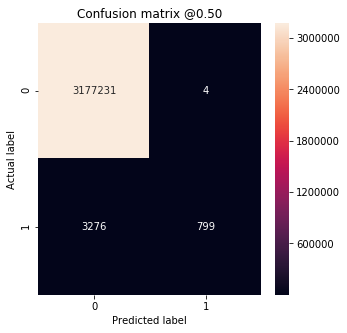

In [52]:
plot_cm(y_test, y_pred_downsampled)

In [53]:
accuracy_score(y_test, y_pred_downsampled)

0.9989689781882306

In [44]:
# Test size affects the outcome a lot.

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
from sklearn.svm import SVC

In [47]:
# svc_mod = SVC(kernel='linear', 
#             class_weight='balanced', # penalize
#             probability=True)
# svc_mod.fit(X_train, y_train)
# svc_pred = svc_mod.predict(X_test)
# roc_auc_score(y_test, svc_pred)
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier()
# rfc.fit(X_train, y_train)

In [56]:
# SVC takes WAY To long time